<a href="https://colab.research.google.com/github/fainsteinf/DNL_1C2022/blob/main/G2_Bifurcaciones1D_Ej6_Switch_Bioquimico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guia 2 - Bifurcaciones en 1D**

**Ejercicio 6. Switch bioquimico.** 

Las bandas de las cebras y los patrones de las mariposas son dos de los
ejemplos más espectaculares de formación de patrones biológicos. Explicar el surgimiento de dichos patrones es un problema abierto en la biología.

Como uno de los ingredientes necesarios para el surgimiento de dichos patrones, Lewis (1979) consideró un ejemplo sencillo de switch bioquímico, donde un gen G se activa por una señal bioquímica S. Por ejemplo, el gen está normalmente desactivado, pero se puede ’prender’ para producir un pigmento, u otro producto de los genes cuando la concentración de S excede cierto umbral. Sea $g(t)$ la concentración
del producto del gen, y asuma la concentraci´on s0 de S como constante. El modelo es:

$ \dot{g} = k_{1}s_{0} - k_{2}g + k_{3} \frac{g^{2}}{k_{4}^{2}+g^{2}} $

donde $k_{j} > 0$ son constantes de reacción. La producción de $g$ es estimulada por $s_{0}$ al ritmo $k_{1}$, y por una retroalimentación auto catalítica o positiva. Hay también un término de degradación controlado por $k_{2}$.


(a) Muestre que el problema se puede llevar a la ecuación adimensional

$ \frac{dx}{d\tau} = s - rx + \frac{x^{2}}{1+x^{2}} $

donde r > 0 y s ≥ 0 son adimensionales.

(b) Muestre que si s = 0, hay dos puntos fijos positivos $x^{∗}$ si r < rc, donde rc debe ser determinado.

(c) Asuma que inicialmente no hay ningún producto en la reacción g(0) = 0, y suponga que s aumenta lentamente desde 0 (la señal activadora se ’prende’): ¿qué pasa con g(t)? ¿Qué pasa si s vuelve a caer a cero? ¿El producto se apaga nuevamente?

(d) Encuentre ecuaciones paramétricas para las curvas de bifurcación en el espacio (r, s) y clasifique las bifurcaciones que ocurren.


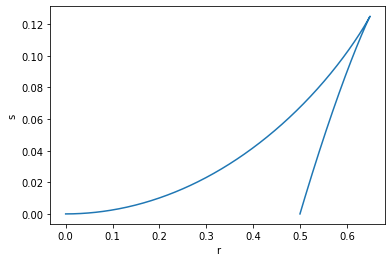

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#dnl guia 2 bifs 1d - switch bioquimico


#Diagrama de bifurcaciones
x = np.linspace(0, 1, 1000)

r_sn = 2 * x / (1 + x**2)**2

s_sn = x**2 * (1 - x**2) / (1+x**2)**2
plt.figure()
plt.plot(r_sn, s_sn)
plt.xlabel("r")
plt.ylabel("s")
plt.show()

En el punto cuspide s vale:  0.12499995640419753
En el punto cuspide r vale:  0.6495189773479977


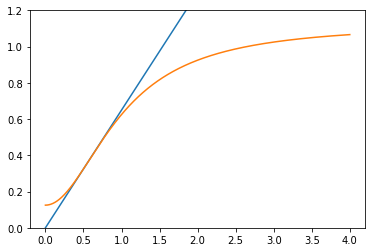

In [2]:
#%% Cuspide

indice = np.argmax(s_sn)
print("En el punto cuspide s vale: ", s_sn[indice])
print("En el punto cuspide r vale: ", r_sn[indice])

xx = np.linspace(0, 4, 1000)

plt.plot(xx, r_sn[indice] * xx)
plt.plot(xx, s_sn[indice] + xx**2 / ( 1 + xx**2 ))
plt.ylim([0,1.2])
plt.show()

In [3]:
#%% Buscamos los puntos fijos
from google.colab import output

# el campo vector
def f(x, r, s): 
    return s - r * x + x**2 / (1+x**2)

#una funcion que devuelve las raices del campo dados r y s
def raices(r, s):
    xx = np.linspace(0, 100, 10000)
    raices = UnivariateSpline(xx, f(xx, r, s), s=0, k=3).roots()
    if f(0, r, s) == 0:
        raices = np.concatenate(([0], raices))
    return raices

# definimos rangos de r y s donde buscaremos puntos fijos
rs = np.linspace(0, 0.65, 100)
ss = np.linspace(0, 0.13, 100)

pfs = []
n_tot = len(rs)*len(ss)
contador = 0
for r in rs:
    for s in ss:
        if contador % 10 == 0:
          print(np.round(100*contador/n_tot, 2),"%")
        elif contador % 100 == 5:
          output.clear()  
        pfs_aux = raices(r, s)
        for k in range(len(pfs_aux)):
            pfs.append(np.concatenate(([r, s], [pfs_aux[k]])))
        contador += 1

99.1 %
99.2 %
99.3 %
99.4 %
99.5 %
99.6 %
99.7 %
99.8 %
99.9 %


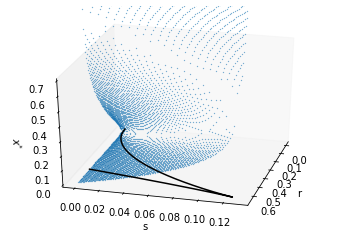

In [4]:
# from mpl_toolkits import mplot3d
pfs = np.array(pfs)

#Graficamos
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pfs[:,0], pfs[:,1], pfs[:,2], '.', ms=0.5)
ax.plot(r_sn, s_sn, np.zeros(len(s_sn)), 'k')
ax.set_zlim([0, 0.7])
ax.grid(False)
# plt.axis('off')
ax.set_xlabel("r")
ax.set_ylabel("s")
ax.set_zlabel(r"$x^{*}$")
ax.view_init(30, 15)
plt.show()

In [6]:
#Un plot interactivo para variar el angulo
from ipywidgets import interact

def graf(angulo):
  fig = plt.figure(figsize=(6,6))
  ax = plt.axes(projection='3d')
  ax.plot(pfs[:,0], pfs[:,1], pfs[:,2], '.', ms=0.5)
  ax.plot(r_sn, s_sn, np.zeros(len(s_sn)), 'k')
  ax.set_zlim([0, 2])
  ax.grid(False)
  plt.axis('off')
  ax.view_init(30, angulo)
  plt.show()

interact(graf, angulo=(0,360,1.))

interactive(children=(FloatSlider(value=180.0, description='angulo', max=360.0, step=1.0), Output()), _dom_cla…

<function __main__.graf>

Cómo armar el gif:

In [ ]:
#Paso 1: guardar las imagenes

# save_folder = "/home/..."  #Carpeta donde guardar las imagenes

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pfs[:,0], pfs[:,1], pfs[:,2], '.', ms=0.5)
ax.plot(r_sn, s_sn, np.zeros(len(s_sn)), 'k')
ax.set_zlim([0, 0.7])
ax.grid(False)
plt.axis('off')
# rotate the axes and update
contador = 0
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.savefig(save_folder+str(contador)+".png", dpi=100)   #Descomentar si queres guardar
    # plt.pause(.0005) 
    contador+=1
plt.show()

In [ ]:
#Guardamos los nombres de los archivos, ordenados, en una lista
lista_files=[]
for k in range(360):
    lista_files.append(save_folder+str(k)+".png")
  
#%%
import imageio
images = []

for filename in lista_files:
    images.append(imageio.imread(filename))
# imageio.mimsave(save_folder+'movie.gif', images)